In [1]:
import os
import mido
import utils ##
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [2]:
import importlib
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\Jafet Velásquez Luna\\Documents\\Cursos\\Dip - IA Aplicada\\Proyecto Final\\hum_transcription_Project_DIA\\utils\\__init__.py'>

# Extraer información de MIDIs

In [3]:
df_midis_info, df_midis_notas = utils.preprocess.procesar_midis(path_carpeta='Datos/MIDIs/midi_data/')
df_midis_info

,key,Genero,PersonID,MusicID,SegmentID,RepetitionID,MetaID,duration,tempo_ms,min_time,min_figure,min_nota,max_nota,min_freq,max_freq,min_cifrado,max_cifrado
0,F01_0001_0001_1_D,F,F01,0001,0001,1,D,8.500000,500000,0.5,negra,60,72,261.625565,523.251131,C4,C5
1,F01_0001_0001_2_D,F,F01,0001,0001,2,D,8.500000,500000,0.5,negra,60,72,261.625565,523.251131,C4,C5
2,F01_0002_0001_1,F,F01,0002,0001,1,None,4.937500,625000,inf,0,62,69,293.664768,440.000000,D4,A4
3,F01_0003_0001_1_D,F,F01,0003,0001,1,D,16.875000,500000,1.0,blanca,60,67,261.625565,391.995436,C4,G4
4,F01_0003_0001_2_D,F,F01,0003,0001,2,D,16.875000,500000,1.0,blanca,60,67,261.625565,391.995436,C4,G4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14609,M05_0496_0001_2,M,M05,0496,0001,2,None,22.833324,833333,inf,0,64,81,329.627557,880.000000,E4,A5
14610,M05_0496_0002_2,M,M05,0496,0002,2,None,24.916657,833333,inf,0,61,76,277.182631,659.255114,C#4,E5
14611,M05_0497_0002_1,M,M05,0497,0002,1,None,8.616671,666667,inf,0,60,72,261.625565,523.251131,C4,C5
14612,M05_0497_0002_2,M,M05,0497,0002,2,None,8.616671,666667,inf,0,60,72,261.625565,523.251131,C4,C5


In [101]:
df_midis_notas

,key,0 (C-1),1 (C#-1),2 (D-1),3 (D#-1),4 (E-1),5 (F-1),6 (F#-1),7 (G-1),8 (G#-1),...,118 (A#8),119 (B8),120 (C9),121 (C#9),122 (D9),123 (D#9),124 (E9),125 (F9),126 (F#9),127 (G9)
0,F01_0001_0001_1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,F01_0001_0001_2_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,F01_0002_0001_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F01_0003_0001_1_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,F01_0003_0001_2_D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14609,M05_0496_0001_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14610,M05_0496_0002_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14611,M05_0497_0002_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14612,M05_0497_0002_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Guardar la información extraída de las etiquetas
df_midis_info.to_csv('datos_procesados/midis/midis_info.csv', index=False)
df_midis_notas.to_csv('datos_procesados/midis/midis_notas.csv', index=False)

# Analizar información

In [6]:
df_midis_info = pd.read_csv('datos_procesados/midis/midis_info.csv')
df_midis_notas = pd.read_csv('datos_procesados/midis/midis_notas.csv', index_col=0)

## Voces

Número de personas:  10


C:\Users\Jafet Velásquez Luna\AppData\Local\Temp\ipykernel_26368\1106445549.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, y[i]*1.01, y[i], ha = 'center')


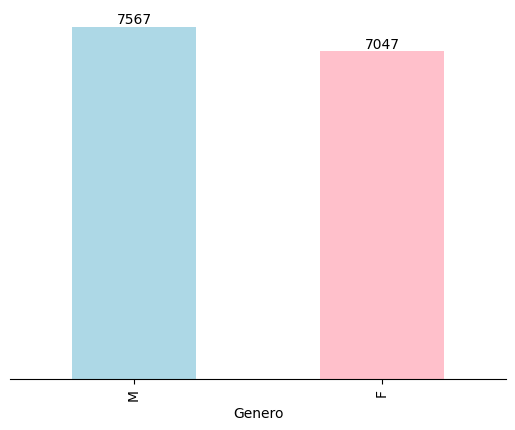

In [7]:
# Distribución de género de personas en el dataset
samples_person = df_midis_info['PersonID'].value_counts().sort_index()



genero_counts = df_midis_info['Genero'].value_counts()
print('Número de personas: ', len(samples_person.index))
ax = genero_counts.plot(kind='bar', color=['lightblue', 'pink'])

# Mejorar visualización
def addlabels(x,y, ax):
    for i in range(len(x)):
        ax.text(i, y[i]*1.01, y[i], ha = 'center')

ax.spines[['left', 'top', 'right']].set_visible(False)
ax.tick_params(left=False)
ax.tick_params(labelleft=False)
addlabels(genero_counts.index, genero_counts, ax)


In [8]:
# Muestras disponibles de cada persona
samples_person

PersonID
F01    1959
F02    1637
F03    1218
F04    1435
F05     798
M01    1773
M02    1935
M03    1149
M04    1969
M05     741
Name: count, dtype: int64

## Notas

In [5]:
df_midis_notas

,0 (C-1),1 (C#-1),2 (D-1),3 (D#-1),4 (E-1),5 (F-1),6 (F#-1),7 (G-1),8 (G#-1),9 (A-1),...,118 (A#8),119 (B8),120 (C9),121 (C#9),122 (D9),123 (D#9),124 (E9),125 (F9),126 (F#9),127 (G9)
key,,,,,,,,,,,,,,,,,,,,,
F01_0001_0001_1_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F01_0001_0001_2_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F01_0002_0001_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F01_0003_0001_1_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F01_0003_0001_2_D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M05_0496_0001_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M05_0496_0002_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
M05_0497_0002_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


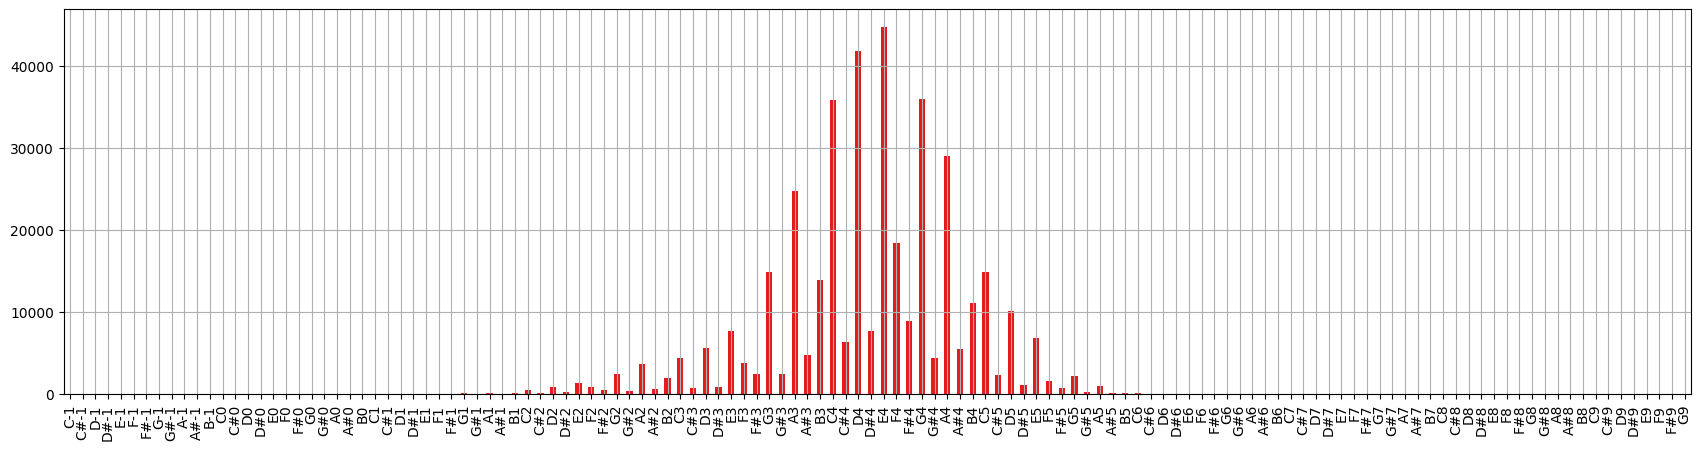

In [4]:
# Histogramas de notas en el conjunto de datos
notas_freq = df_midis_notas.sum()
notas_freq.index = notas_freq.index.str.extract(r'\((.*?)\)', expand=False)

ax = notas_freq.plot(kind='bar', figsize=(21,5), colormap="Set1")
ax.grid(True)

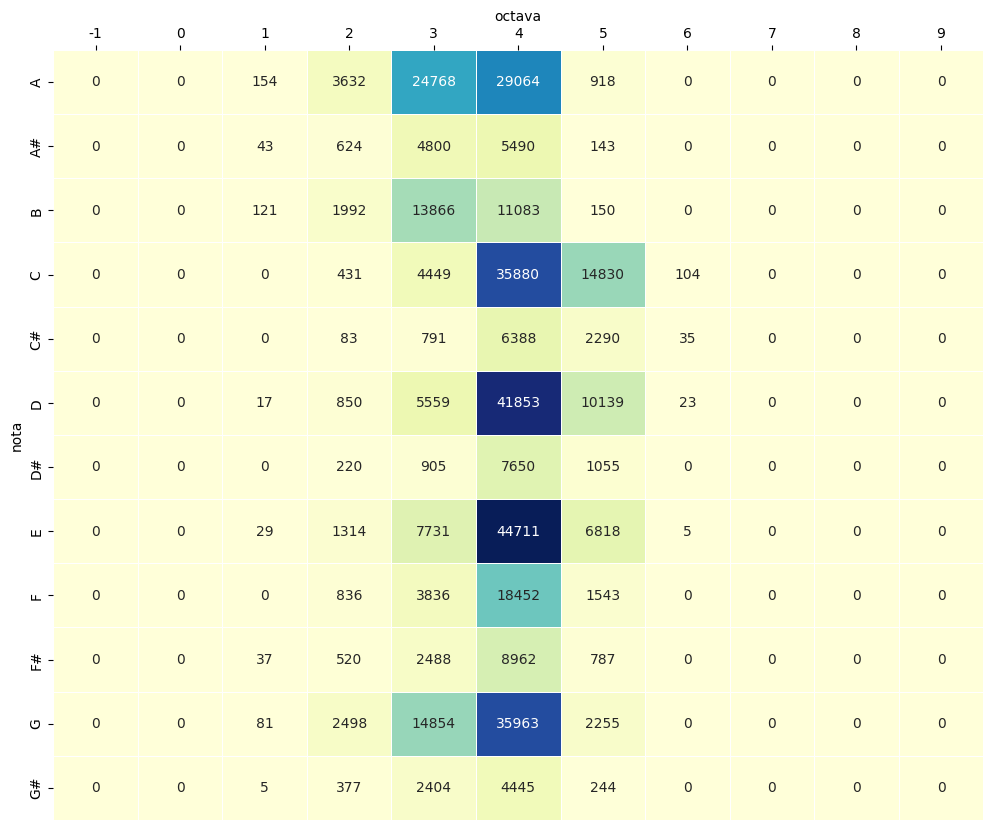

In [10]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 10))

notas_freq_df = notas_freq.reset_index()
notas_freq_df[['nota', 'octava']] = notas_freq_df['index'].str.extract(r'([A-Z]#?)(-?\d+)', expand=True)

notas_freq_pivot = notas_freq_df.pivot(index='nota', columns='octava', values=0)
notas_freq_pivot = notas_freq_pivot.fillna(0)

# Creamos el heatmap
sns.heatmap(notas_freq_pivot, annot=True, linewidths=0.5, fmt=".0f", cmap='YlGnBu', cbar=False)
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

C:\Users\Jafet Velásquez Luna\AppData\Local\Temp\ipykernel_26368\4218046743.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('cividis', len(tesituras))


Muestras en bajo:  234726
Muestras en baritono:  295433
Muestras en tenor:  336392
Muestras en alto:  353632
Muestras en mezzo:  334254
Muestras en soprano:  291217


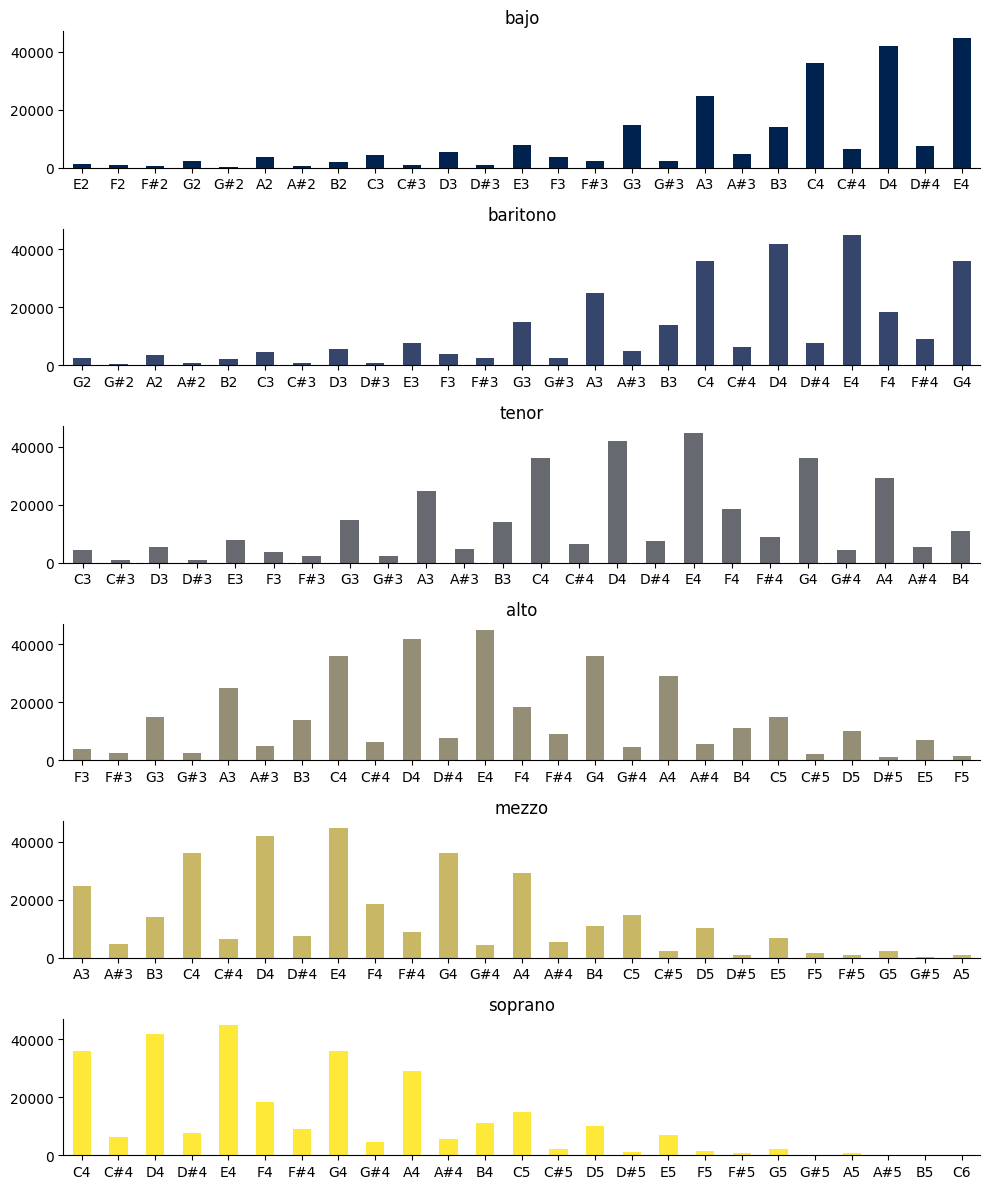

In [11]:
tesituras = {
    'bajo': notas_freq.loc['E2':'E4'],
    'baritono': notas_freq.loc['G2':'G4'],
    'tenor': notas_freq.loc['C3':'B4'],
    'alto': notas_freq.loc['F3':'F5'],
    'mezzo': notas_freq.loc['A3':'A5'],
    'soprano': notas_freq.loc['C4':'C6']
}

fig, axs = plt.subplots(6,1, figsize=(10, 2*6))


cmap = cm.get_cmap('cividis', len(tesituras))
norm = mcolors.Normalize(vmin=0, vmax=5)


for (i,ax), (rango,freqs) in zip(enumerate(axs), tesituras.items()):
    color = cmap(norm(i))
    print(f'Muestras en {rango}: ', freqs.sum())

    ax.set_title(rango)
    ax.spines[[ 'top', 'right']].set_visible(False)
    freqs.plot(kind='bar', ax=ax, color=color)
    ax.tick_params(axis='x', labelrotation=0)

fig.tight_layout()

## Velocidades

Ya que la velocidad de la pieza (BPM) se calcula como

$$BPM = \frac{6\times 10^7}{tempo}$$

entonces el máximo BPM se alcanza minimizando el tempo.

Máximo tempo:  384615
Máximo BPM:  156


<Axes: >

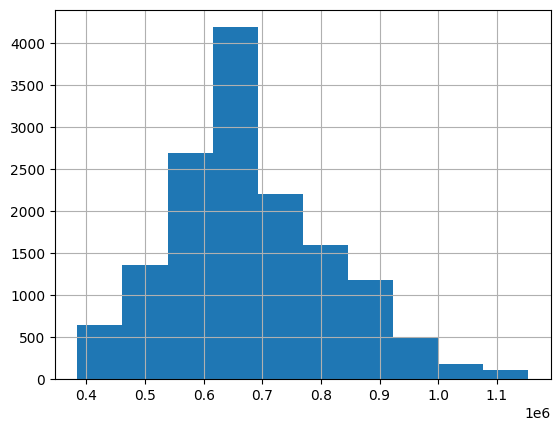

In [7]:
# Análisis de BPM
micro_p_min = 6e+7
print('Máximo tempo: ', df_midis_info.tempo_ms.min())
print('Máximo BPM: ', round(micro_p_min / df_midis_info.tempo_ms.min()))
df_midis_info.tempo_ms.hist()

Esto es relevante por que se requiere precisión en tiempo para determinar el inicio del ataque de los tarareos, por ello, la ventana que mejor podría describir estos cambios en los datos, es aquella que se ajuste a los cambios tan rápidos como el mayor BPM y figura musical más corta.

In [5]:
df_midis_info

,key,Genero,PersonID,MusicID,SegmentID,RepetitionID,MetaID,duration,tempo_ms,min_time,min_figure,min_nota,max_nota,min_freq,max_freq,min_cifrado,max_cifrado
0,F01_0001_0001_1_D,F,F01,0001,0001,1,D,8.500000,500000,0.5,negra,60,72,261.625565,523.251131,C4,C5
1,F01_0001_0001_2_D,F,F01,0001,0001,2,D,8.500000,500000,0.5,negra,60,72,261.625565,523.251131,C4,C5
2,F01_0002_0001_1,F,F01,0002,0001,1,None,4.937500,625000,inf,0,62,69,293.664768,440.000000,D4,A4
3,F01_0003_0001_1_D,F,F01,0003,0001,1,D,16.875000,500000,1.0,blanca,60,67,261.625565,391.995436,C4,G4
4,F01_0003_0001_2_D,F,F01,0003,0001,2,D,16.875000,500000,1.0,blanca,60,67,261.625565,391.995436,C4,G4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14609,M05_0496_0001_2,M,M05,0496,0001,2,None,22.833324,833333,inf,0,64,81,329.627557,880.000000,E4,A5
14610,M05_0496_0002_2,M,M05,0496,0002,2,None,24.916657,833333,inf,0,61,76,277.182631,659.255114,C#4,E5
14611,M05_0497_0002_1,M,M05,0497,0002,1,None,8.616671,666667,inf,0,60,72,261.625565,523.251131,C4,C5
14612,M05_0497_0002_2,M,M05,0497,0002,2,None,8.616671,666667,inf,0,60,72,261.625565,523.251131,C4,C5


## Duración

<Axes: >

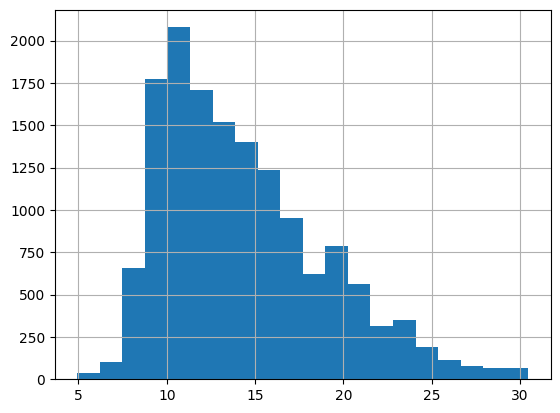

In [9]:
df_midis_info['duration'].hist(bins=20)

In [10]:
df_midis_info['duration'].describe()

count    14614.000000
mean        14.314910
std          4.589805
min          4.937500
25%         10.625000
50%         13.285717
75%         17.000000
max         30.468750
Name: duration, dtype: float64

Conocer la distribución de los audios, permite tomar mejores decisiones sobre la longitud máxima de las cadenas minimizando la pérdida de integridad de los audios y, a su vez, disminuyendo la complejidad del espacio de búsqueda.

## MIDI

In [7]:
mid = mido.MidiFile('Datos/MIDIs/midi_data/F01_0182_0002_2_D.mid')
mid

MidiFile(type=1, ticks_per_beat=1024, tracks=[
  MidiTrack([
    MetaMessage('set_tempo', tempo=600000, time=0),
    MetaMessage('key_signature', key='C', time=0),
    MetaMessage('time_signature', numerator=3, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
    MetaMessage('end_of_track', time=1024)]),
  MidiTrack([
    MetaMessage('track_name', name='é\x92¢ç\x90´, Piano', time=0),
    Message('program_change', channel=0, program=0, time=0),
    Message('pitchwheel', channel=0, pitch=0, time=0),
    Message('program_change', channel=0, program=0, time=0),
    Message('program_change', channel=0, program=0, time=0),
    Message('note_on', channel=0, note=52, velocity=81, time=2560),
    Message('note_off', channel=0, note=52, velocity=0, time=512),
    Message('note_on', channel=0, note=57, velocity=101, time=0),
    Message('note_off', channel=0, note=57, velocity=0, time=1536),
    Message('note_on', channel=0, note=57, velocity=81, time=0),
    Message('n

### Tipos de MIDI

El MIDI estándar cumple:
- `note_on` para marcar la ejecución de la nota ($\text{velocity} > 0$).
- `note_off` marca la finalización de la nota ($\text{velocity} = 0$) y expresa la duración de la nota ($\text{time} > 0$)
- Si `note_on` tiene un $\text{time} > 0$ indica silencio antes de ejecutarse.

Los MIDI no estándar son aquellos que no siguen esta convención.

In [5]:
# Generar dataframe con la información específica del tipo de MIDI

path_carpeta = 'Datos/MIDIs/midi_data/'
data_midi_types = []
tickperbeat_list = []
for filename in os.listdir(path_carpeta):
    path_archivo = os.path.join(path_carpeta, filename)
    midi = mido.MidiFile(path_archivo)
    
    # Problema note_on consecutivos
    note_on_problem = utils.midi.detect_note_on_consecutives(midi)

    # Precisión de ticks
    tickperbeat = midi.ticks_per_beat

    # Información de primera nota
    _, tempo, vel, offset = utils.midi.first_note_data(midi)
    offset_secs = offset
    offset_ticks = mido.second2tick(offset_secs, ticks_per_beat=tickperbeat, tempo=tempo)
    

    data_midi_types.append([filename, note_on_problem, tickperbeat, vel, offset_secs, offset_ticks])

df_midi_types = pd.DataFrame(data_midi_types, columns=['filename', 'problem?', 'ticks', 'velocity', 'offset_sec', 'offset_tick'])

#### Características de MIDIs

In [6]:
# Si tiene problem con "note_on" consecutivo, tiene tick_per_beat = 480
print((df_midi_types[df_midi_types['problem?']]['ticks'] == 480).unique())
# Si NO tiene problem con "note_on" consecutivo, tiene tick_per_beat = 1024
print((df_midi_types[~df_midi_types['problem?']]['ticks'] == 1024).unique())

[ True]
[ True]


In [7]:
df_midi_types['ticks'].value_counts()

ticks
1024    10053
480      4561
Name: count, dtype: int64

In [8]:
df_midi_types['problem?'].value_counts()

problem?
False    10053
True      4561
Name: count, dtype: int64

Todos los MIDIs del tipo 2: Con `note_on` consecutivos (marcan el inicio y el final de la nota en lugar de usar `note_off` para el final) tienen una precisión de ticks menor (480).

In [9]:
# Separar los MIDIs en estándar (tipo 1) y no estándar (tipo 2)
df_standard = df_midi_types[~df_midi_types['problem?']]
df_non_standard = df_midi_types[df_midi_types['problem?']]

In [140]:
mid = mido.MidiFile('Datos/MIDIs/midi_data/F01_0001_0001_1_D.mid')

MidiFile(type=1, ticks_per_beat=1024, tracks=[
  MidiTrack([
    MetaMessage('set_tempo', tempo=500000, time=0),
    MetaMessage('key_signature', key='C', time=0),
    MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
    MetaMessage('end_of_track', time=1024)]),
  MidiTrack([
    MetaMessage('track_name', name='é\x92¢ç\x90´, Piano', time=0),
    Message('program_change', channel=0, program=0, time=0),
    Message('pitchwheel', channel=0, pitch=0, time=0),
    Message('program_change', channel=0, program=0, time=0),
    Message('program_change', channel=0, program=0, time=0),
    Message('note_on', channel=0, note=60, velocity=80, time=0),
    Message('note_off', channel=0, note=60, velocity=0, time=1024),
    Message('note_on', channel=0, note=62, velocity=80, time=0),
    Message('note_off', channel=0, note=62, velocity=0, time=1024),
    Message('note_on', channel=0, note=64, velocity=80, time=0),
    Message('note

- Test

In [174]:
import mido

# Crea un nuevo archivo MIDI
midi_file = mido.MidiFile()

# Crea una nueva pista MIDI
track = mido.MidiTrack()
midi_file.tracks.append(track)

# Tempo
track.append(mido.MetaMessage('set_tempo', tempo=mido.bpm2tempo(240)))

# Agrega mensajes para las notas (por ejemplo, C4 y E4)
note_on_c4 = mido.Message('note_on', note=60, velocity=64, time=0)
note_off_c4 = mido.Message('note_off', note=60, velocity=0, time=240)  # Duración de 500 ms
note_on_e4 = mido.Message('note_on', note=64, velocity=64, time=1.5)
note_off_e4 = mido.Message('note_off', note=64, velocity=0, time=0.75)  # Duración de 500 ms

# Agrega los mensajes a la pista
track.append(note_on_c4)
track.append(note_off_c4)
track.append(note_on_e4)
track.append(note_off_e4)

In [175]:
midi_file

MidiFile(type=1, ticks_per_beat=480, tracks=[
  MidiTrack([
    MetaMessage('set_tempo', tempo=250000, time=0),
    Message('note_on', channel=0, note=60, velocity=64, time=0),
    Message('note_off', channel=0, note=60, velocity=0, time=240),
    Message('note_on', channel=0, note=64, velocity=64, time=1.5),
    Message('note_off', channel=0, note=64, velocity=0, time=0.75)])
])

In [176]:
for msg in midi_file:
    if msg.type == 'note_off':
        print(msg.time)
        time_var = msg.time
        break
time_var

0.125


0.125

In [177]:
for msg in midi_file:
    if msg.type == 'set_tempo':
        print(msg.tempo)
        tempo_var = msg.tempo
        break
tempo_var

250000


250000

#### MIDIs Tipo 2 (No estándar)

Los MIDI no estándar comienzan y terminan las notas con `note_on`, además seccionan la duración de las notas en distintos mensajes. 

Para estandarizarlos todos al tipo 1 (`note_on` / `note_off` y que la duración de la nota sólo aparezca en un sólo mensaje de `note_off`) se analizará antes el caso en el que existan notas con silencios antes de ejecutarse (`note_on`con $\text{time} > 0$).

In [121]:
df_non_standard[df_non_standard.offset_sec > 0]

,filename,problem?,ticks,velocity,offset_sec,offset_tick
42,F01_0020_0001_1.mid,True,480,114,1.714284,1920
43,F01_0020_0001_2.mid,True,480,114,1.714284,1920
154,F01_0053_0001_1.mid,True,480,80,1.500000,1440
155,F01_0053_0001_2.mid,True,480,80,1.500000,1440
156,F01_0053_0002_1.mid,True,480,80,1.500000,1440
...,...,...,...,...,...,...
14370,M05_0299_0001_2.mid,True,480,101,0.300000,240
14426,M05_0365_0001_1.mid,True,480,101,0.428571,240
14427,M05_0365_0001_2.mid,True,480,101,0.428571,240
14447,M05_0389_0001_1.mid,True,480,114,0.416666,240


In [102]:
mid = mido.MidiFile('Datos/MIDIs/midi_data/F01_0020_0001_1.mid')
mid

MidiFile(type=1, ticks_per_beat=480, tracks=[
  MidiTrack([
    MetaMessage('track_name', name='é\x92¢ç\x90´, Piano', time=0),
    MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0),
    MetaMessage('key_signature', key='Eb', time=0),
    MetaMessage('set_tempo', tempo=428571, time=0),
    Message('control_change', channel=0, control=121, value=0, time=0),
    Message('program_change', channel=0, program=0, time=0),
    Message('control_change', channel=0, control=7, value=100, time=0),
    Message('control_change', channel=0, control=10, value=64, time=0),
    Message('control_change', channel=0, control=91, value=0, time=0),
    Message('control_change', channel=0, control=93, value=0, time=0),
    MetaMessage('midi_port', port=0, time=0),
    Message('note_on', channel=0, note=63, velocity=114, time=1920),
    Message('note_on', channel=0, note=63, velocity=0, time=179),
    Message('note_on', channel=0, note=65, vel

#### Efectos del tipo en la duración

- Diferencia en figuras (No estándar / Estándar)

In [77]:
df_midis_info[df_midi_types['problem?']].min_figure.unique()

array([0], dtype=object)

In [78]:
df_midis_info[~df_midi_types['problem?']].min_figure.unique()

array(['negra', 'blanca', 'corchea', 0, 'semicorchea'], dtype=object)

- Diferencia en tiempos mínimos (No estándar / Estándar)

In [79]:
df_midis_info[df_midi_types['problem?']].min_time.unique()

array([inf])

In [80]:
lowest_time = df_midis_info[~df_midi_types['problem?']].min_time.min()
df_midis_info[~df_midi_types['problem?']].min_time.unique()

array([0.5       , 1.        , 0.25      , 0.625     , 0.652174  ,
       0.3       , 0.3125    , 0.40909125, 0.46875   , 0.234375  ,
       0.545455  , 0.277778  , 0.340909  , 0.923077  , 0.857143  ,
       0.9375    , 0.6       , 0.555556  , 0.9       , 0.4285715 ,
       0.3658535 , 0.42857175, 0.8571435 , 1.142858  , 0.833333  ,
       0.2542375 , 0.666667  , 0.2857145 , 0.3333335 , 0.571429  ,
       0.8       , 0.4       , 0.461538  , 0.326087  , 0.631579  ,
       0.3157895 , 0.454545  , 0.2608695 , 0.2       , 0.2727275 ,
       0.8181825 , 0.3846155 , 0.15      , 0.4615385 , 0.689655  ,
       0.517241  , 0.23076925, 1.304348  , 0.348837  , 0.48      ,
       0.24      , 0.2586205 , 0.4166665 , 0.352941  , 0.4347825 ,
       0.789474  , 0.394737  , 1.184211  , 0.2884615 , 0.483871  ,
       0.230769  , 0.375     , 0.75      , 0.384615  , 1.125     ,
       0.444444  , 0.222222  , 1.1111115 , 0.3703705 , 0.4545455 ,
       0.909091  , 0.66176475, 0.50000025, 0.4411765 , 0.92307

In [82]:
# Duración de la nota más corta en los MIDI estándar
print(lowest_time, "s")

0.125 s


- El `lowest_time` es la duración en segundos de la nota más corta (rápida) en todos los MIDI. Esta puede corresponder a una figura básica (negra, corchea, semicorchea, etc.) o a una composición de ellas. Lo importante es que este valor captura el mínimo de precisión requerido para describir todas las notas en las melodías.

#### Exportar datos estándar y no estándar

In [ ]:
df_non_standard['filename'] = df_non_standard['filename'].str.replace(".mid", "")
df_standard['filename'] = df_standard['filename'].str.replace(".mid", "")

In [94]:
# Guardar la información extraída de los tipos MIDI
df_non_standard.to_csv('datos_procesados/midis/tipos/no_estandar.csv', index=False)
df_standard.to_csv('datos_procesados/midis/tipos/estandar.csv', index=False)

## Otros

#### Corregir problema

In [12]:
def ticks_per_fusa(ticks_per_beat):
    # Una fusa es 1/32 de una negra, NO NECESARIO: time_signature[0] nos da el número de negras por compás
    beats_por_fusa = 1 / 32
    # Calcular el número de ticks por fusa
    ticks_fusa = ticks_per_beat * beats_por_fusa
    
    return ticks_fusa

In [10]:
def correct_midi_file(file_path, output_path, ticks_per_beat, fusa_threshold):
    midi = mido.MidiFile(file_path)
    tempo = 500000  # default tempo (120 BPM)
    
    # for track in midi.tracks:
    #     for msg in track:
    #         if msg.type == 'set_tempo':
    #             tempo = msg.tempo
    #             break

    corrected_tracks = []

    for track in midi.tracks:
        corrected_track = mido.MidiTrack()
        current_time = 0
        for i, msg in enumerate(track):
            current_time += msg.time
            if msg.type == 'note_on' and msg.velocity == 0:
                msg.type = 'note_off'
            corrected_track.append(msg)
            
            # Revisar por silencio pequeño antes del siguiente "note_on"
            if i < len(track) - 1:
                next_msg = track[i + 1]
                if next_msg.type == 'note_on' and next_msg.time < fusa_threshold and msg.type == 'note_off':
                    msg.time += next_msg.time
                    next_msg.time = 0

        corrected_tracks.append(corrected_track)

    corrected_midi = mido.MidiFile()
    corrected_midi.tracks.extend(corrected_tracks)
    corrected_midi.save(output_path)

def microseconds_to_ticks(microseconds, tempo, ticks_per_beat):
    return int((microseconds / (tempo / ticks_per_beat)) + 0.5)

In [ ]:
# Corregir MIDIs
path_carpeta_a = 'Datos/MIDIs/midi_data/'
path_carpeta_b = 'datos_procesados/midis/'
fusa_threshold_ms = ticks_per_fusa(480) #480 es la resolución en ticks máxima que comparten todos los MIDIs

for filename in df_non_standard['filename']:
    path_input = os.path.join(path_carpeta_a, filename)
    path_output = os.path.join(path_carpeta_b, "corregido_" + filename)
    midi = mido.MidiFile(path_input)
    ticks_per_beat = midi.ticks_per_beat
    correct_midi_file(path_input, path_output, ticks_per_beat, fusa_threshold_ms)

In [ ]:
# Corregir MIDIs
path_carpeta_a = 'Datos/MIDIs/midi_data/'
path_carpeta_b = 'datos_procesados/midis/'
fusa_threshold_ms = ticks_per_fusa(480) #480 es la resolución en ticks máxima que comparten todos los MIDIs

for filename in ['M05_0497_0002_1.mid']:
    path_input = os.path.join(path_carpeta_a, filename)
    path_output = os.path.join(path_carpeta_b, "corregido_" + filename)
    midi = mido.MidiFile(path_input)
    ticks_per_beat = midi.ticks_per_beat
    correct_midi_file(path_input, path_output, ticks_per_beat, fusa_threshold_ms)